In [57]:
#Import Main Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from unicodedata import normalize

In [2]:
#Read in the emissions data file 
train_file = "Resources/grocery_train.csv/grocery_train.csv"
train_df = pd.read_csv(train_file)
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
len(train_df)

3000888

In [4]:
# check data types for SQL compatibility 
train_df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [5]:
# convert 'date' column to datetime format for merging with other CSV's 
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [6]:
# read in the holiday data file 
holiday_file = "resources/holidays_events.csv"
holiday_df = pd.read_csv(holiday_file)
holiday_df.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [7]:
len(holiday_df)

350

In [8]:
holiday_df.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [9]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
holiday_df.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

In [10]:
#drop rows that contain specific 'value' in 'column_name'
cleaned_hol = holiday_df[holiday_df['transferred'] == False]

In [11]:
# cleaned_holiday= holiday_df.loc[holiday_df["transferred"] != "FALSE"]
len(cleaned_hol)

338

In [12]:
cleaned_hol.drop_duplicates(subset='date', inplace=True)
len(cleaned_hol)

C:\Users\victo\AppData\Local\Temp\ipykernel_41004\415807744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hol.drop_duplicates(subset='date', inplace=True)


300

In [13]:
# drop transferred, cluster and type_x column 
holiday_df = cleaned_hol.drop(['type', "locale_name", "transferred" ], axis=1)
holiday_df.head()

,date,locale,description
0,2012-03-02,Local,Fundacion de Manta
1,2012-04-01,Regional,Provincializacion de Cotopaxi
2,2012-04-12,Local,Fundacion de Cuenca
3,2012-04-14,Local,Cantonizacion de Libertad
4,2012-04-21,Local,Cantonizacion de Riobamba


In [14]:
merged_holiday = pd.merge(train_df, holiday_df, on ='date', how="left")
merged_holiday

,id,date,store_nbr,family,sales,onpromotion,locale,description
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,National,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.000,0,National,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.000,0,National,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.000,0,National,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.000,0,National,Primer dia del ano
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Local,Fundacion de Riobamba
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Local,Fundacion de Riobamba
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Local,Fundacion de Riobamba
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Local,Fundacion de Riobamba


In [15]:
#Read in the emissions data file 
oil_file = "Resources/oil.csv"
oil_df = pd.read_csv(oil_file)
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [16]:
cleaned_oil = oil_df.dropna()
cleaned_oil.head()

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [17]:
cleaned_oil[cleaned_oil["dcoilwtico"] > 100]

,date,dcoilwtico
131,2013-07-03,101.92
133,2013-07-05,103.09
134,2013-07-08,103.03
135,2013-07-09,103.46
136,2013-07-10,106.41
...,...,...
407,2014-07-24,102.76
408,2014-07-25,105.23
409,2014-07-28,105.68
410,2014-07-29,104.91


In [18]:
# convert 'date' column to datetime format for merging with other CSV's 
cleaned_oil['date'] = pd.to_datetime(cleaned_oil['date'])
cleaned_oil.dtypes

C:\Users\victo\AppData\Local\Temp\ipykernel_41004\3050356060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_oil['date'] = pd.to_datetime(cleaned_oil['date'])


date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [19]:
train_df["date"] = "2013-07-08"

In [20]:
final_train = pd.merge(merged_holiday, cleaned_oil, on ='date', how="left")
final_train.head()

,id,date,store_nbr,family,sales,onpromotion,locale,description,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,National,Primer dia del ano,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,National,Primer dia del ano,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,National,Primer dia del ano,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,National,Primer dia del ano,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,National,Primer dia del ano,NaN


Victor Edit

In [21]:
# final_train.loc[final_train["dcoilwtico"] <= 100] = 1
# final_train.loc[final_train["dcoilwtico"] > 100] = 0

In [22]:
cleaned_final_train = final_train.dropna(subset=['dcoilwtico'])
cleaned_final_train

,id,date,store_nbr,family,sales,onpromotion,locale,description,dcoilwtico
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,NaN,NaN,93.14
1783,1783,2013-01-02,1,BABY CARE,0.000,0,NaN,NaN,93.14
1784,1784,2013-01-02,1,BEAUTY,2.000,0,NaN,NaN,93.14
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,NaN,NaN,93.14
1786,1786,2013-01-02,1,BOOKS,0.000,0,NaN,NaN,93.14
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Local,Fundacion de Riobamba,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Local,Fundacion de Riobamba,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Local,Fundacion de Riobamba,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Local,Fundacion de Riobamba,47.57


In [87]:
# filter = cleaned_final_train["store_nbr"]==1
# store1Sales = cleaned_final_train[filter].groupby([cleaned_final_train.date, cleaned_final_train.dcoilwtico])["sales"].sum().reset_index(name='sales')
store1Sales = cleaned_final_train.groupby([cleaned_final_train.date, cleaned_final_train.dcoilwtico])["sales"].sum().reset_index(name='sales')
store1Sales = store1Sales.sort_values("dcoilwtico", ascending=False)
store1Sales

,date,dcoilwtico,sales
171,2013-09-06,110.62,335442.247929
165,2013-08-28,110.17,319322.060993
172,2013-09-09,109.62,377151.707003
164,2013-08-27,109.11,319688.219019
175,2013-09-12,108.72,282855.730937
...,...,...,...
766,2016-01-19,28.47,630929.750990
781,2016-02-09,27.96,746939.640160
782,2016-02-10,27.54,790988.713851
767,2016-01-20,26.68,738744.013045


<AxesSubplot:>

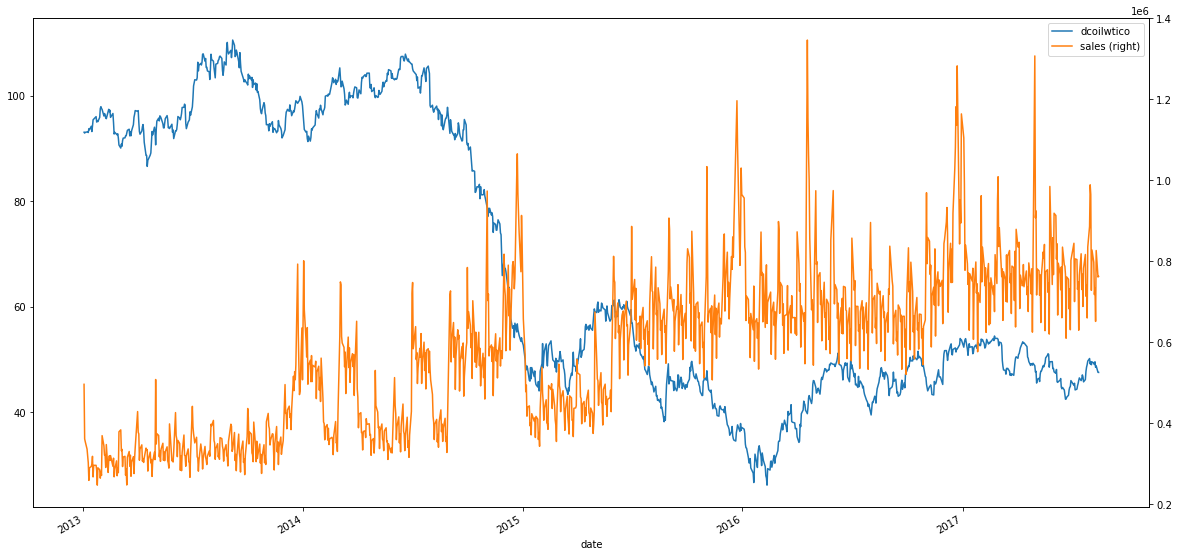

In [91]:
fig, ax = plt.subplots(figsize=(20,10))

store1Sales.plot(x = 'date', y = 'dcoilwtico', ax = ax)
store1Sales.plot(x = 'date', y = 'sales', ax = ax, secondary_y = True)

In [84]:
filter = cleaned_final_train["store_nbr"]==9
store9Sales = cleaned_final_train[filter].groupby([cleaned_final_train.date, cleaned_final_train.dcoilwtico])["sales"].sum().reset_index(name='sales')
store9Sales = store9Sales.sort_values("dcoilwtico", ascending=False)
store9Sales

,date,dcoilwtico,sales
171,2013-09-06,110.62,8792.78100
165,2013-08-28,110.17,7916.48500
172,2013-09-09,109.62,11551.26902
164,2013-08-27,109.11,8568.91700
175,2013-09-12,108.72,8694.50900
...,...,...,...
766,2016-01-19,28.47,15087.39600
781,2016-02-09,27.96,20463.80300
782,2016-02-10,27.54,15689.83400
767,2016-01-20,26.68,15216.03400


In [43]:
oil_corr = cleaned_final_train.corr()
oil_corr

,id,store_nbr,sales,onpromotion,dcoilwtico
id,1.000000,3.017058e-04,0.089763,0.200066,-8.395021e-01
store_nbr,0.000302,1.000000e+00,0.033855,0.006489,1.295243e-14
sales,0.089763,3.385528e-02,1.000000,0.452035,-7.905016e-02
onpromotion,0.200066,6.489376e-03,0.452035,1.000000,-1.524182e-01
dcoilwtico,-0.839502,1.295243e-14,-0.079050,-0.152418,1.000000e+00


<AxesSubplot:xlabel='dcoilwtico', ylabel='sales'>

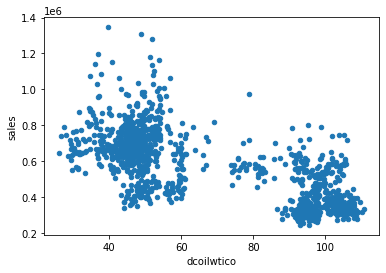

In [92]:
store1Sales.plot.scatter(x = 'dcoilwtico', y = 'sales')

In [88]:
oil_corr = store1Sales.corr()
oil_corr

,dcoilwtico,sales
dcoilwtico,1.000000,-0.705002
sales,-0.705002,1.000000


In [93]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X = store1Sales['dcoilwtico'].values.reshape(-1,1)
y = store1Sales['sales'].values.reshape(-1,1)

print(X.shape, y.shape)

(1163, 1) (1163, 1)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [96]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

mean squared error (MSE): 19192957525.721634
R-squared (R2): 0.47770071256407043


In [98]:
# Call the `score()` method on the model to show the R2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.47770071256407043